# Prediction of index using ARIMA

This notebook shows how to use ARIMA to predict the index of a time series.

Author: Martin Erpicum


## Importing the libraries

In [61]:
!pip3 install statsmodels
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime as dt

In [62]:

df = pd.read_csv('./index_df.csv', sep=';')

df['valid_since'] = pd.to_datetime(df['valid_since'], format='%d/%m/%Y')
df.index = df['valid_since']
df['index'] = df['index'].str.replace(',', '.').astype(float)
df.head()



,valid_since,index,rank
valid_since,,,
1990-01-01,1990-01-01,1.0000,0
1990-02-01,1990-02-01,1.0200,1
1990-10-01,1990-10-01,1.0404,2
1991-03-01,1991-03-01,1.0612,3
1991-12-01,1991-12-01,1.0824,4


In [63]:
arima_model = ARIMA(df['index'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 122.533
Date:                Mon, 10 Oct 2022   AIC                           -239.066
Time:                        10:02:24   BIC                           -234.577
Sample:                             0   HQIC                          -237.556
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3080.841      0.000       0.999       1.001
ma.L1         -0.9783      0.089    -11.015      0.000      -1.152      -0.804
sigma2          3e-05   1.68e-05      1.785      0.0

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



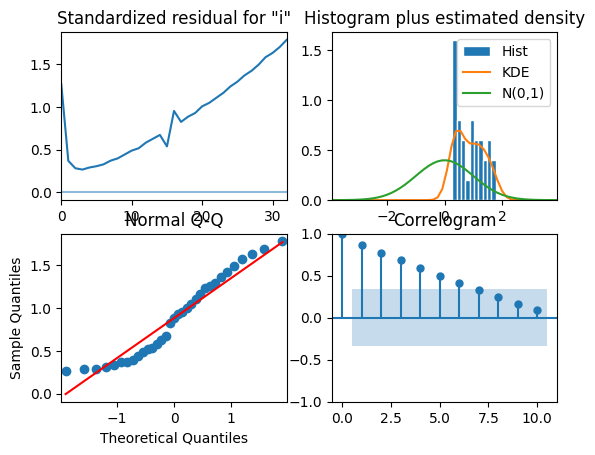

In [64]:
# plot arima model fit
arima_model_fit.plot_diagnostics()
plt.show()


In [65]:
fig = make_subplots()
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0])
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0])

# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# add legend
fig.update_layout(showlegend=True)


fig.show()


In [66]:
# forecast for next 5 years with 
forecast = arima_model_fit.get_forecast(steps=60)
forecast_df = forecast.summary_frame(alpha=0.05)

# add date to forecast
forecast_df.head()

# changer index to datetime for each month
forecast_df.index = pd.date_range(start=df.index[-1], periods=60, freq='MS')


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [68]:


# plot forecast
fig = make_subplots(rows=1, cols=1)
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_lower', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_upper', title='Indexation').data[0], row=1, col=1)

# change color of trace
# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# change color of trace
fig.data[2].line.color = 'green'
fig.data[3].line.color = 'grey'
fig.data[4].line.color = 'purple'

fig.show()